<a href="https://colab.research.google.com/github/swlee123/Forage-British-Airways-VI/blob/main/Task_2_British_Airways_Forage_VI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.shape[0]

50000

In [ ]:
df["route"]

0        AKLDEL
1        AKLDEL
2        AKLDEL
3        AKLDEL
4        AKLDEL
          ...  
49995    PERPNH
49996    PERPNH
49997    PERPNH
49998    PERPNH
49999    PERPNH
Name: route, Length: 50000, dtype: object

Now we visualize the number of customers that have completed booking 

In [ ]:
complete = 0
for result in df["booking_complete"]:
  if result == 1:
    complete+=1
print(f" {complete} passengers out of {df.shape[0]} completed booking")

 7478 passengers out of 50000 completed booking


We visualize the count of each booking origin to know where our potential customer come from

In [ ]:
df["booking_origin"].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [ ]:
count_dict = df['booking_origin'].value_counts().to_dict()

In [ ]:
# max count of booking origin
max_count = 0 
max_country = ''
for x in count_dict:
  if count_dict[x]>max_count:
    max_count = count_dict[x]
    max_country = x

min_count = 10
min_country = ''
for x in count_dict:
  if count_dict[x]<max_count:
    min_count = count_dict[x]
    min_country = x


print(f"{max_country} have the most booking origin : {count_dict[max_country]}")

print(f"{min_country} have the least booking origin : {count_dict[min_country]}")

Australia have the most booking origin : 17872
Svalbard & Jan Mayen have the least booking origin : 1


Visualize the route 

In [ ]:
df["route"].unique()

Seems like there is tons of different route and I think we could exclude the route as it is tedious and waste of computation

In [ ]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

## Determine the part of data that is going to be used
Basically we use all the data except the ***route*** because I think for the model it is first after that we will adust and decide which feature(s) to drop

In [ ]:
# one-hot-encode some of thhe column

pd_data_dum = pd.get_dummies(df, columns=['sales_channel','trip_type','booking_origin'])

In [ ]:
# show data
pd_data_dum.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,AKLDEL,1,0,0,5.52,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,AKLDEL,0,0,0,5.52,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,AKLDEL,1,1,0,5.52,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,AKLDEL,0,0,1,5.52,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,AKLDEL,1,0,1,5.52,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd_data_dum.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560,...,0.000040,0.000020,0.000040,0.000180,0.0001,0.000840,0.003460,0.009120,0.000020,0.007760
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643,...,0.006324,0.004472,0.006324,0.013415,0.0100,0.028971,0.058721,0.095063,0.004472,0.087749
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# drop the route column

pd_data_dum = pd_data_dum.drop(columns=["route"])

In [ ]:
pd_data_dum

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,7,0,0,0,5.62,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,6,0,0,1,5.62,0,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,1,0,1,5.62,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# separate data and label

x = pd_data_dum.drop(columns = ["booking_complete"])
y = pd_data_dum["booking_complete"]

In [ ]:
x

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5.52,1,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5.52,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,1,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,7,0,0,0,5.62,1,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,6,0,0,1,5.62,1,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,1,0,1,5.62,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

## Machine Learning Model

Now we are going to build a Machine Learning Model using random forest algorithm

In [ ]:
# turn to numpy array

x_np_arr = x.to_numpy()
y_np_arr = y.to_numpy()


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_np_arr,y_np_arr,test_size=0.2)

In [ ]:
# check the split data

x_train.shape,x_test.shape

((40000, 118), (10000, 118))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred = model.predict(x_test)

## Visualizing the result of prediction

In [ ]:
# classification report 

from sklearn import metrics

print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      9660
           1       0.11      0.47      0.18       340

    accuracy                           0.85     10000
   macro avg       0.54      0.67      0.55     10000
weighted avg       0.95      0.85      0.89     10000



Text(91.68, 0.5, 'prediction label')

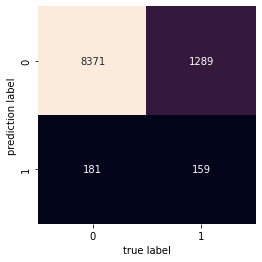

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(matrix.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel("true label")
plt.ylabel("prediction label")


## create a visualisation to interpret how each variable contributed to the model

use selectfrommodel to determine the importance of each features

SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.

In [ ]:
from sklearn.feature_selection import SelectFromModel

select = SelectFromModel(model)
select.fit(x_train,y_train)


SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000))

In [ ]:
# to see which features in more important
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
x_train

array([[  1.,  90.,  87., ...,   0.,   0.,   0.],
       [  2., 127.,  23., ...,   0.,   0.,   0.],
       [  1.,   2.,   5., ...,   0.,   0.,   0.],
       ...,
       [  1.,  27.,   2., ...,   0.,   0.,   0.],
       [  1.,   1.,   3., ...,   0.,   0.,   0.],
       [  1., 103.,  18., ...,   0.,   0.,   0.]])

In [ ]:
x_train.shape

(40000, 118)

## Selecting the useful features 


In [ ]:
selected_feat= x.columns[(select.get_support())]
len(selected_feat)

11

In [ ]:
selected_feat

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_origin_Australia',
       'booking_origin_Malaysia'],
      dtype='object')

In [ ]:
# use new data

x = x[selected_feat]

In [ ]:
x

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_origin_Australia,booking_origin_Malaysia
0,2,262,19,7,6,1,0,0,5.52,0,0
1,1,112,20,3,6,0,0,0,5.52,0,0
2,2,243,22,17,3,1,1,0,5.52,0,0
3,1,96,31,4,6,0,0,1,5.52,0,0
4,2,68,22,15,3,1,0,1,5.52,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,1,0
49996,1,111,6,4,7,0,0,0,5.62,1,0
49997,1,24,6,22,6,0,0,1,5.62,1,0
49998,1,15,6,11,1,1,0,1,5.62,1,0


In [ ]:
# dropping the booking_origin
x = x.drop(columns=["booking_origin_Australia","booking_origin_Malaysia"])

In [ ]:
x

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,262,19,7,6,1,0,0,5.52
1,1,112,20,3,6,0,0,0,5.52
2,2,243,22,17,3,1,1,0,5.52
3,1,96,31,4,6,0,0,1,5.52
4,2,68,22,15,3,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62
49996,1,111,6,4,7,0,0,0,5.62
49997,1,24,6,22,6,0,0,1,5.62
49998,1,15,6,11,1,1,0,1,5.62


In [ ]:
# turn to numpy array

x_np_arr_new = x.to_numpy()
y_np_arr_new = y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x_np_arr_new,y_np_arr_new,test_size=0.2)

In [ ]:
# check the split data

x_train_new.shape,x_test_new.shape
model_2 = RandomForestClassifier(n_estimators=1000)

In [ ]:
model_2.fit(x_train_new,y_train_new)

RandomForestClassifier(n_estimators=1000)

In [ ]:
# make prediction
y_pred_2 = model_2.predict(x_test_new)

In [ ]:

print(metrics.classification_report(y_pred_2,y_test_new))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      9805
           1       0.06      0.43      0.10       195

    accuracy                           0.85     10000
   macro avg       0.52      0.64      0.51     10000
weighted avg       0.97      0.85      0.90     10000



Text(91.68, 0.5, 'prediction label')

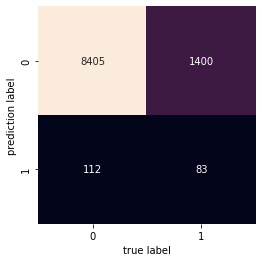

In [ ]:
matrix_new = confusion_matrix(y_test_new,y_pred_2)

sns.heatmap(matrix_new.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel("true label")
plt.ylabel("prediction label")


Using the feature importance variable to see feature importance scores.

In [ ]:

feature_scores = pd.Series(model_2.feature_importances_, index=x.columns).sort_values(ascending=False)


In [ ]:
feature_scores

purchase_lead            0.302999
flight_hour              0.193562
length_of_stay           0.162427
flight_day               0.116745
flight_duration          0.113185
num_passengers           0.058659
wants_in_flight_meals    0.024814
wants_preferred_seat     0.015067
wants_extra_baggage      0.012540
dtype: float64

## Visualize the features score

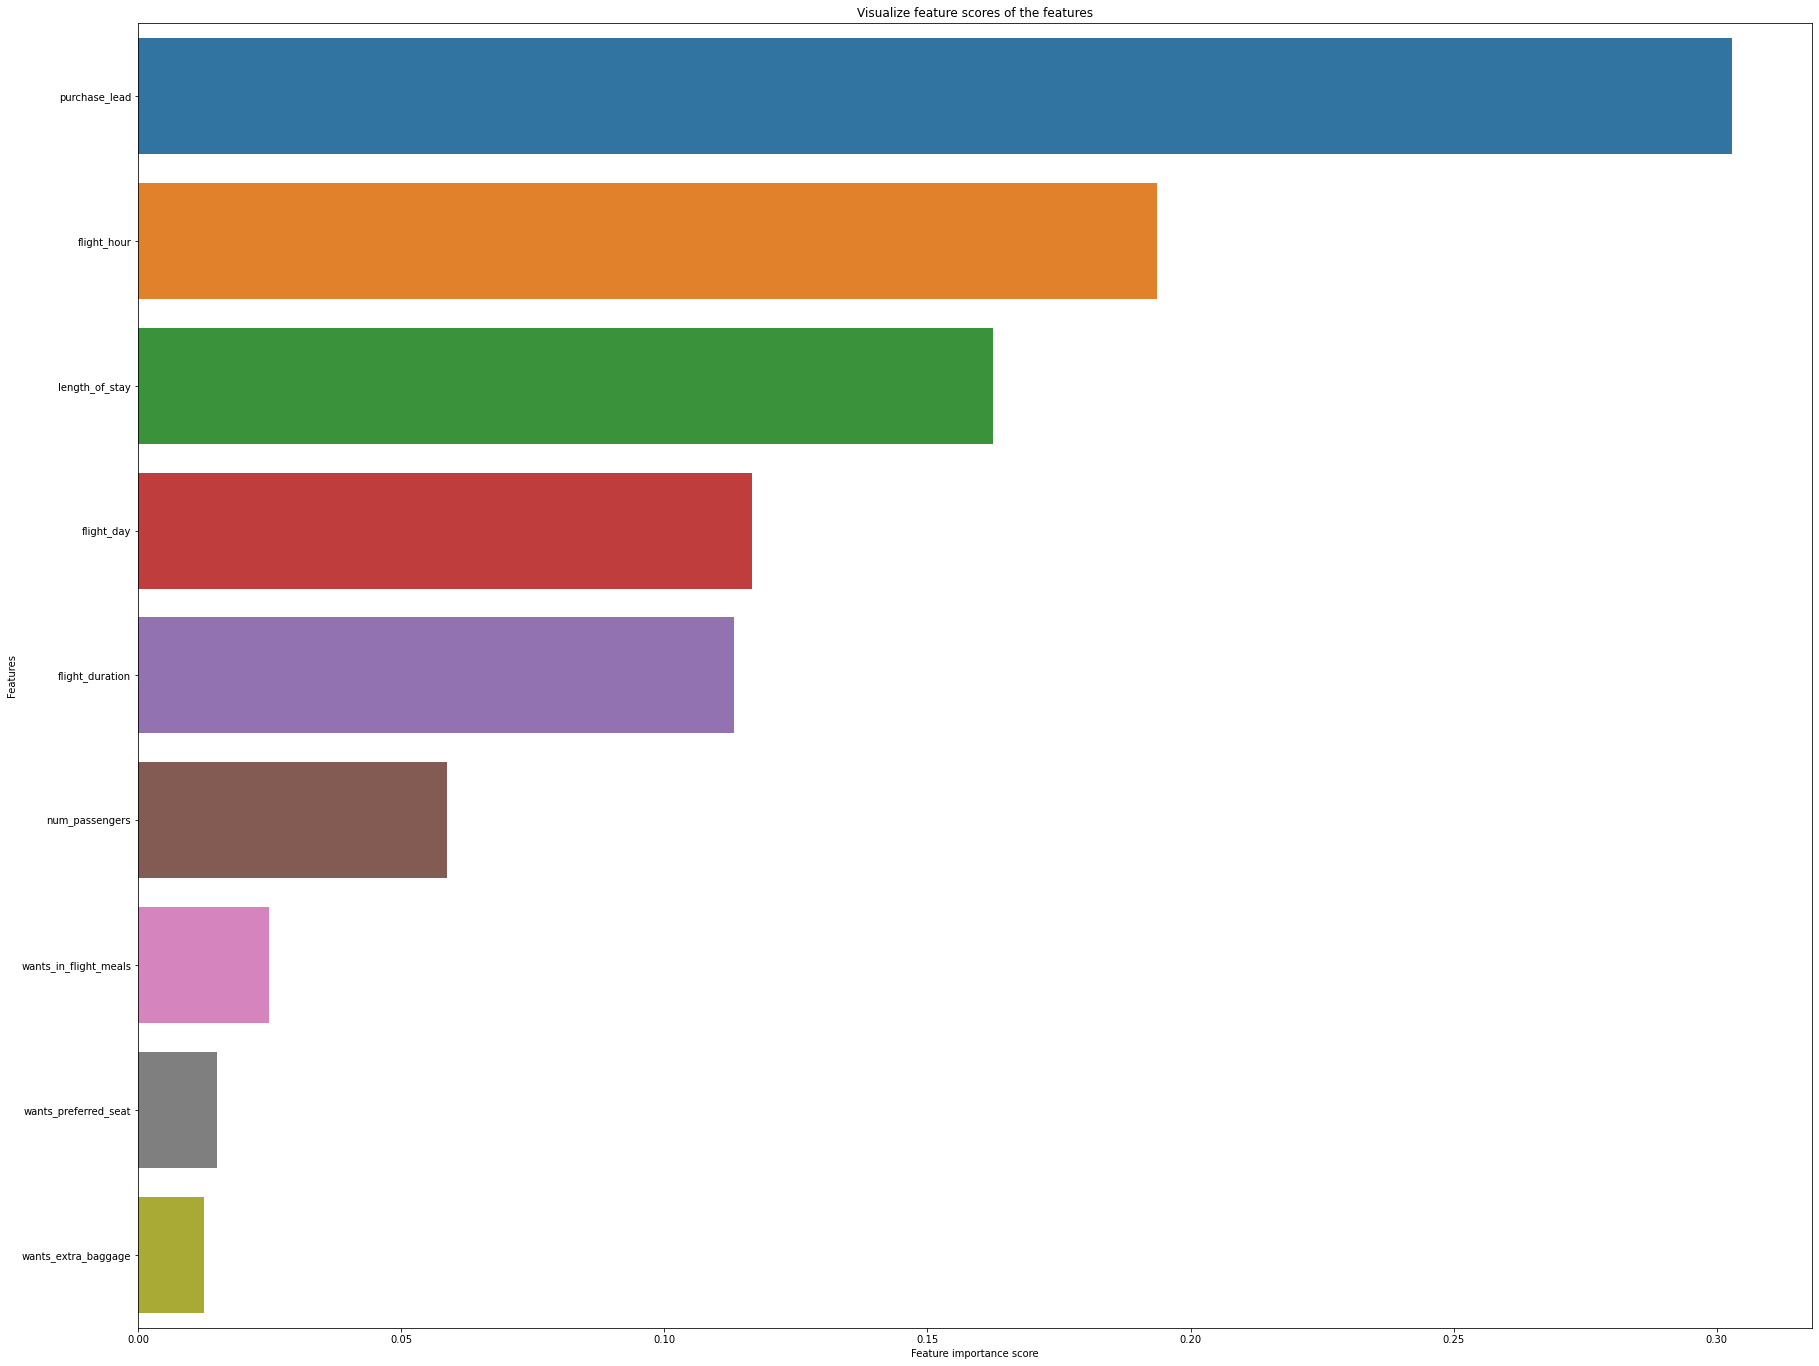

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()